In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('swiggy.csv')

In [4]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


## Data Dictionary
*  id - Every restaurant is having a unique ID
*  name - Name of the Restaurant
*  city - The city where the restaurant is located
*  rating - Rating of the Restaurant
*  rating_count - Number of People given the Rating
*  cost - Cost for two of eating in that restaurant
*  cuisine - Cuisines that restaurant serves
*  lic_no - License number of that restaurant
*  link - Restaurant link on Swiggy website
*  address - Full address of the restaurant


In [5]:
df.tail()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
148536,553122,The Food Delight,Yavatmal,--,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,--,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,--,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,--,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json
148540,447770,Lazeez kitchen,Yavatmal,--,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [7]:
df.describe()

,id
count,148541.000000
mean,363466.378912
std,167890.977174
min,211.000000
25%,233320.000000
50%,412628.000000
75%,502223.000000
max,581031.000000


## Possible Business Objective


*   How do I increase my business?

1.   Which cuisine is most profitable?
2.   Which is the most popular cuisine?
3.   Which city is most profitable?

--> What can I do to increase my average order value? 




## Possible PreProcessing
* Remove rupee symbol in cost
* Convert ratings to numeric (handle --)
* Remove null values - cost,
* Handle rating_count (convert to numeric)
* Handle cuisine (split?)

## Possible EDA
* What is the count of cities?
* Top n restras with highest ratings
* Top n cities with highest cost
* Top n cities with popular cuisines

# Preprocessing

In [8]:
df.isna().sum()

id                0
name             86
city              0
rating           86
rating_count     86
cost            131
cuisine          99
lic_no          229
link              0
address          86
menu              0
dtype: int64

## Removing null Rows

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

## Handling null Ratings

In [11]:
df['rating'].replace('--',np.nan,inplace = True)
# df["rating"].fillna(df["rating"].median(), inplace = True)
df['rating'].fillna(-999.0,inplace = True)
df['rating'] = df['rating'].astype('float')

In [12]:
df.tail()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
148536,553122,The Food Delight,Yavatmal,-999.0,Too Few Ratings,₹ 200,"Fast Food,Snacks",21522053000452,https://www.swiggy.com/restaurants/the-food-de...,"The Food Delight, 94MC+X35, New Singhania Naga...",Menu/553122.json
148537,562647,MAITRI FOODS & BEVERAGES,Yavatmal,-999.0,Too Few Ratings,₹ 300,Pizzas,license,https://www.swiggy.com/restaurants/maitri-food...,"MAITRI FOODS & BEVERAGES, POLIC MITRYA SOCIETY...",Menu/562647.json
148538,559435,Cafe Bella Ciao,Yavatmal,-999.0,Too Few Ratings,₹ 300,"Fast Food,Snacks",21522251000378,https://www.swiggy.com/restaurants/cafe-bella-...,"Cafe Bella Ciao, SHOP NO 2 NEMANI MARKET SBI S...",Menu/559435.json
148539,418989,GRILL ZILLA,Yavatmal,-999.0,Too Few Ratings,₹ 250,Continental,21521251000241,https://www.swiggy.com/restaurants/grill-zilla...,"GRILL ZILLA, SHO NO 2/6, POSTEL GROUND CHOWPAT...",Menu/418989.json
148540,447770,Lazeez kitchen,Yavatmal,-999.0,Too Few Ratings,₹ 200,Pizzas,21521251000634,https://www.swiggy.com/restaurants/lazeez-kitc...,"Lazeez kitchen, 94G3+2RR, Wadgaon, Yavatmal, M...",Menu/447770.json


# Handling categorical count of ratings

In [13]:
# from sklearn import preprocessing

# label_encoder = preprocessing.LabelEncoder()
# df['rating_count'] = label_encoder.fit_transform(df['rating_count'])

# df.head()

# Handling special symbol in cost (for two)

In [14]:
sample_cost = '₹ 300'
float(sample_cost[1:])

300.0

In [15]:
df['cost'] = df['cost'].str[1:].astype('float')

In [16]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,-999.0,Too Few Ratings,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,-999.0,Too Few Ratings,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


# Exploratory Analysis

## How many cities does Swiggy serve?

In [17]:
df.city.nunique()

821

## How many restaurants are within Swiggy's purview?

In [18]:
df.name.nunique()

112683

In [19]:
df.id.nunique()

148255

## What are the most popular food chains?

In [20]:
df.name.value_counts().head(30)

Domino's Pizza                                     442
Pizza Hut                                          319
KFC                                                309
Kwality Walls Frozen Dessert and Ice Cream Shop    299
Baskin Robbins                                     274
Subway                                             227
Faasos - Wraps & Rolls                             197
LunchBox - Meals and Thalis                        195
The Biryani Life                                   195
The Good Bowl                                      194
Oven Story Pizza                                   191
Firangi Bake                                       191
McDonald's                                         187
The Belgian Waffle Co.                             186
Behrouz Biryani                                    185
Faasos' Signature Wraps & Rolls                    178
NIC Natural Ice Creams                             174
Grameen Kulfi                                      173
Sweet Trut

## What is the rating distribution?

In [21]:
df.rating.value_counts()

-999.0    86912
 4.0       6524
 4.1       6288
 4.2       5811
 3.8       5728
 3.9       5428
 4.3       5005
 3.7       4239
 4.4       3145
 3.5       2958
 3.6       2918
 3.4       1878
 3.3       1796
 4.5       1775
 4.6       1332
 3.2       1199
 3.0        858
 3.1        790
 4.7        648
 2.8        473
 2.9        471
 4.8        338
 2.7        325
 2.5        220
 5.0        209
 2.6        207
 4.9        172
 2.3        128
 2.4        118
 2.2         89
 2.0         72
 2.1         61
 1.9         46
 1.8         27
 1.5         18
 1.6         17
 1.7         13
 1.4         10
 1.2          4
 1.3          3
 1.1          1
 1.0          1
Name: rating, dtype: int64

In [22]:
df.rating.value_counts().sort_index()

-999.0    86912
 1.0          1
 1.1          1
 1.2          4
 1.3          3
 1.4         10
 1.5         18
 1.6         17
 1.7         13
 1.8         27
 1.9         46
 2.0         72
 2.1         61
 2.2         89
 2.3        128
 2.4        118
 2.5        220
 2.6        207
 2.7        325
 2.8        473
 2.9        471
 3.0        858
 3.1        790
 3.2       1199
 3.3       1796
 3.4       1878
 3.5       2958
 3.6       2918
 3.7       4239
 3.8       5728
 3.9       5428
 4.0       6524
 4.1       6288
 4.2       5811
 4.3       5005
 4.4       3145
 4.5       1775
 4.6       1332
 4.7        648
 4.8        338
 4.9        172
 5.0        209
Name: rating, dtype: int64

In [23]:
ratings_df = 100 * df.rating.value_counts().sort_index()/len(df)
ratings_df = ratings_df.reset_index()
ratings_df.columns = ['rating', 'percentage']
ratings_df['rating'] = ratings_df['rating'].astype(str)
ratings_df.head()

,rating,percentage
0,-999.0,58.623318
1,1.0,0.000675
2,1.1,0.000675
3,1.2,0.002698
4,1.3,0.002024


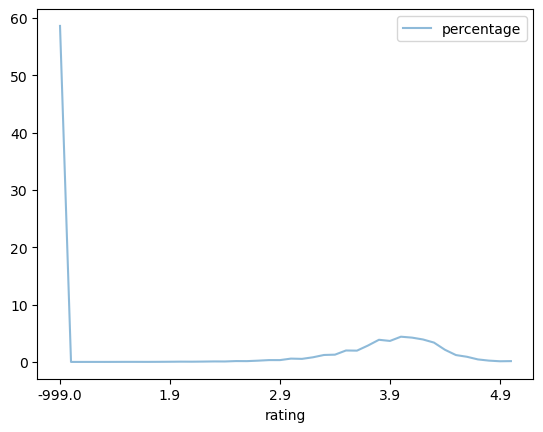

In [24]:
ratings_df.plot(x = 'rating',y='percentage',alpha = 0.5);

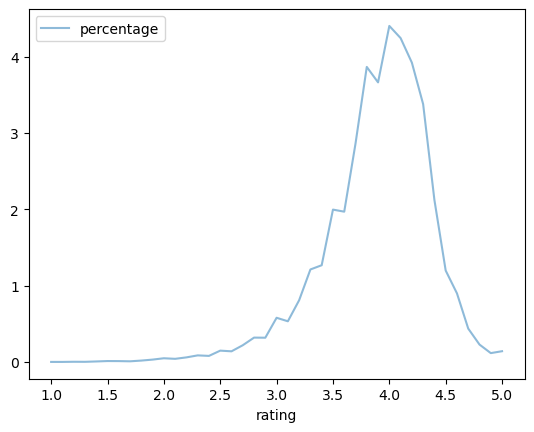

In [25]:
ratings_df = ratings_df.tail(-1)
ratings_df.plot(x="rating", y="percentage", alpha=0.5);

In [26]:
ratings_df

,rating,percentage
1,1.0,0.000675
2,1.1,0.000675
3,1.2,0.002698
4,1.3,0.002024
5,1.4,0.006745
6,1.5,0.012141
7,1.6,0.011467
8,1.7,0.008769
9,1.8,0.018212
10,1.9,0.031028


## Which city had the most restaurants?

In [27]:
# dataframe -> split it by city into 821 smaller dataframes -> get the id column from each dataframe -> count the unique ids ->
# -> city, unique_count (821 dataframes) -> combine them -> sort -> top 20
df.groupby(['city'])['id'].nunique().sort_values(ascending=False).head(20)

city
Bikaner                      1665
Noida-1                      1424
Indirapuram,Delhi            1279
BTM,Bangalore                1159
Rohini,Delhi                 1135
Kothrud,Pune                 1086
Indiranagar,Bangalore        1079
Electronic City,Bangalore    1039
Greater Kailash 2,Delhi      1037
Vashi,Mumbai                 1021
Kukatpally,Hyderabad         1008
Viman Nagar,Pune             1000
sohna road,Gurgaon            973
Koramangala,Bangalore         953
Laxmi Nagar,Delhi             930
Gomti Nagar,Lucknow           915
HSR,Bangalore                 898
Malviya Nagar,Delhi           896
Madhapur,Hyderabad            892
Wakad,Pune                    868
Name: id, dtype: int64

## Which city has the best food?

In [28]:
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,-999.0,Too Few Ratings,200.0,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,200.0,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,250.0,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,-999.0,Too Few Ratings,250.0,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [29]:
df['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'],
      dtype=object)

In [30]:
# City with best restaurants
sub1 = df[df['rating_count'].isin(['100+ ratings','500+ ratings', '1K+ ratings', '5K+ ratings', '10K+ ratings'])]
sub1.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,100.0,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
6,156588,shere punjab veg,Abohar,4.0,100+ ratings,150.0,North Indian,22120652000021,https://www.swiggy.com/restaurants/shere-punja...,"shere punjab veg, major surinder chowk near ve...",Menu/156588.json
38,351387,NIKKU VEG THALI,Abohar,4.1,100+ ratings,150.0,North Indian,22121652000183,https://www.swiggy.com/restaurants/nikku-veg-t...,"NIKKU VEG THALI, College Road, Near Railway Li...",Menu/351387.json
63,165533,IFC Restaurant,Adilabad,3.5,100+ ratings,400.0,American,13619001000093,https://www.swiggy.com/restaurants/ifc-restaur...,"IFC Restaurant, Jagadamba Towers, Gandhi Print...",Menu/165533.json
65,242943,Hot N Chill Restaurant,Adilabad,3.5,100+ ratings,150.0,"European,Italian",13619001000192,https://www.swiggy.com/restaurants/hot-n-chill...,"Hot N Chill Restaurant, H NO 4 -4 -703 BHUKTHA...",Menu/242943.json


In [31]:
sub2 = sub1[sub1['rating'] >= 4.8]

In [32]:
sub2.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
8710,332602,Kwality Walls Frozen Dessert and Ice Cream Shop,Balurghat,4.8,100+ ratings,300.0,Ice Cream,12819005000009,https://www.swiggy.com/restaurants/kwality-wal...,Kwality Walls Frozen Dessert and Ice Cream Sho...,Menu/332602.json
10012,286156,SOUR HOUSE,"Koramangala,Bangalore",4.8,100+ ratings,400.0,Bakery,11220334000219,https://www.swiggy.com/restaurants/sour-house-...,"SOUR HOUSE, 606, 20th main, Koramangala 8th block",Menu/286156.json
10766,446568,Dairy Day Ice Creams,"JP Nagar,Bangalore",4.8,100+ ratings,200.0,"Ice Cream,Desserts",11219334001941,https://www.swiggy.com/restaurants/dairy-day-i...,"Dairy Day Ice Creams, Crunch Time - Ashok Niva...",Menu/446568.json
12075,534276,NAALNAAD MANE,"Arekere,Bangalore",4.8,100+ ratings,438.0,"Indian,South Indian",11222334000255,https://www.swiggy.com/restaurants/naalnaad-ma...,"NAALNAAD MANE, 16,2ND FLOOR GOWRY'S BUILDING,A...",Menu/534276.json
13491,383734,Senoritas Mexican kitchen by Little Italy,"Indiranagar,Bangalore",4.8,100+ ratings,500.0,"Mexican,Desserts",11216333001082,https://www.swiggy.com/restaurants/senoritas-m...,"Senoritas Mexican kitchen by Little Italy, No....",Menu/383734.json


In [33]:
sub2.city.value_counts()

Manasarovar,Jaipur               3
Gondal                           3
South Kolkata,Kolkata            2
Jadavpur,Kolkata                 2
Mahalaxmi Malabar Hill,Mumbai    2
Mansa                            1
Lake Town,Kolkata                1
Dumdum,Kolkata                   1
Dugri,Ludhiana                   1
Mandsaur                         1
Muktsar                          1
Central Kolkata,Kolkata          1
Vashi,Mumbai                     1
Scruz Bandra East,Mumbai         1
Bajaj Nagar,Nagpur               1
Nizamabad                        1
North-goa                        1
Hinjewadi,Pune                   1
Behala,Kolkata                   1
Balurghat                        1
Koramangala,Bangalore            1
Kolhapur                         1
Katni                            1
Tolichowki,Hyderabad             1
Banjara Hills,Hyderabad          1
Old Gurgaon (Zone 6),Gurgaon     1
Greater Kailash 2,Delhi          1
Jasola,Delhi                     1
Annanagar,Chennai   

## What is the cost distribution?

In [34]:
df.cost.sort_values(ascending = False)

70762     300350.0
21626       8000.0
47552       6000.0
47817       5023.0
107779      5000.0
            ...   
94098          1.0
109636         1.0
121078         1.0
148236         1.0
43814          1.0
Name: cost, Length: 148255, dtype: float64

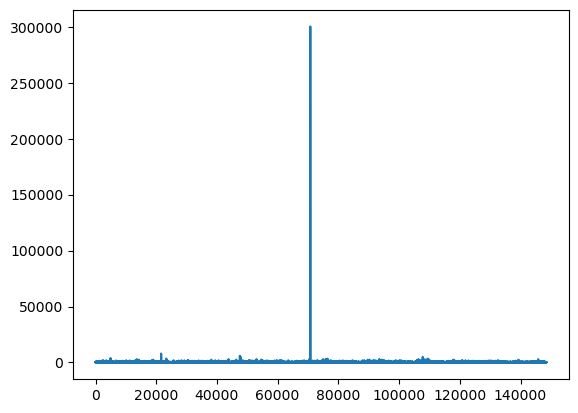

In [35]:
df.cost.plot();

In [36]:
import numpy as np
np.argmax(df['cost'])

70642

In [37]:
df.iloc[70642]

id                                                         477718
name                                               KOHINOOR HOTEL
city                                                   Hinganghat
rating                                                     -999.0
rating_count                                      Too Few Ratings
cost                                                     300350.0
cuisine                                      North Indian,Chinese
lic_no                                             21521269001428
link            https://www.swiggy.com/restaurants/kohinoor-ho...
address         KOHINOOR HOTEL, LIBOURY CHOWK TAKA GROUND NR-B...
menu                                             Menu/477718.json
Name: 70762, dtype: object

In [38]:
pd.set_option('display.max_colwidth', None)
df.iloc[70642]

id                                                                                           477718
name                                                                                 KOHINOOR HOTEL
city                                                                                     Hinganghat
rating                                                                                       -999.0
rating_count                                                                        Too Few Ratings
cost                                                                                       300350.0
cuisine                                                                        North Indian,Chinese
lic_no                                                                               21521269001428
link            https://www.swiggy.com/restaurants/kohinoor-hotel-hinganghat-city-hinganghat-477718
address                            KOHINOOR HOTEL, LIBOURY CHOWK TAKA GROUND NR-BUS STOP HINGANGHAT


In [39]:
df = df[df['id'] != 477718]

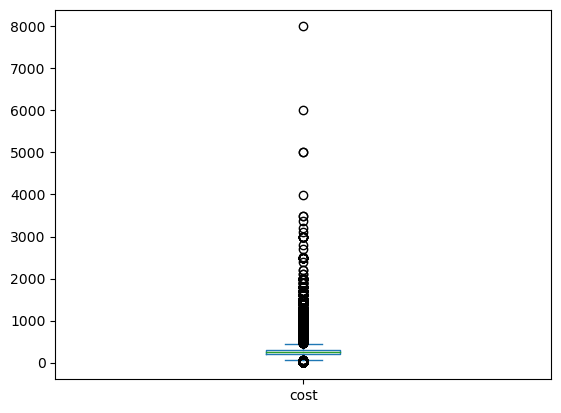

In [40]:
df['cost'].plot(kind='box');

### What are the most expensive places?

In [41]:
df.sort_values(by='cost', ascending = False).head(20)

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
21626,456114,Oasis restaurant,"Electronic City,Bangalore",-999.0,Too Few Ratings,8000.0,"Biryani,North Indian",21221010000753,https://www.swiggy.com/restaurants/oasis-restaurant-electronic-city-bangalore-456114,"Oasis restaurant, Neeladri Road, Karuna Nagar, Electronics City Phase 1, Karuna Nagar, Electronics City Phase 1, Doddathoguru, Bengaluru, Karnataka 560100, India",Menu/456114.json
47552,565958,VENOM CLUB AND KITCHEN,"Hathibarkala,Dehradun",-999.0,Too Few Ratings,6000.0,"Italian,Indian",12621005000488,https://www.swiggy.com/restaurants/venom-club-and-kitchen-jakhan-hathi-barkala-dehradun-565958,"VENOM CLUB AND KITCHEN, 1st & 2nd Floor , 76/52 , Canal Road , Lane No : 3 , Dehradun , Uttarakhand , Dehradun Nagar Nigam, Dehradun, Uttarakhand-248001",Menu/565958.json
47817,524995,Aggarwal sweet india,"GTB Nagar,Delhi",-999.0,Too Few Ratings,5023.0,Chinese,23320002000105,https://www.swiggy.com/restaurants/aggarwal-sweet-india-gtb-nagar-delhi-524995,"Aggarwal sweet india, 199, Stadium Rd, Block A, Gujranwala Town, Delhi, 110009, India",Menu/524995.json
107779,564511,SHAAN RESTAURANT,"Vashi,Mumbai",-999.0,Too Few Ratings,5000.0,"Chinese,Indian",11522016000100,https://www.swiggy.com/restaurants/shaan-restaurant-vashi-mumbai-564511,"SHAAN RESTAURANT, SHOP NO. 1, G SQUARE BUSINESS PARK, PLOT NO. 25 & 26, SECTOR - 30, SANPADA, NAVI MUMBAI ,Turbhe Zone,Navi Mumbai Municipal Corporation (Thane Zone-3),Maharashtra-400705",Menu/564511.json
4930,579304,Rock N Shawarma Take Away,Ajmer,-999.0,Too Few Ratings,3999.0,Arabian,22221056000763,https://www.swiggy.com/restaurants/rock-n-shawarma-take-away-north-ajmer-ajmer-579304,"Rock N Shawarma Take Away, NEAR HINDUSTAN MACHINE TOOLS, HANDI RESTURANT OPPT.HMT OFFICE ,AJMER , Ajmer , Ajmer, Ajmer, Rajasthan-305003",Menu/579304.json
109414,369682,"Ministry of Crab, Mumbai","Scruz Bandra East,Mumbai",-999.0,Too Few Ratings,3500.0,"Sri Lankan,Seafood",11518006000877,https://www.swiggy.com/restaurants/ministry-of-crab-mumbai-bkc-scruz-bandra-east-mumbai-369682,"Ministry of Crab, Mumbai, 442, Chitrakar Dhurandar Marg, 14th Rd, Khar West, Mumbai, Maharashtra 400052",Menu/369682.json
23334,477654,Olive Beach,"Central Bangalore,Bangalore",-999.0,Too Few Ratings,3500.0,"Italian,Mediterranean",11218333000076,https://www.swiggy.com/restaurants/olive-beach-union-park-ashok-nagar-bangalore-477654,"Olive Beach, 16, Wood St, near Karnataka Bank, Ashok Nagar, Bengaluru, Karnataka 560025",Menu/477654.json
76454,469411,SRS HAVMOR,"Manikonda,Hyderabad",-999.0,Too Few Ratings,3360.0,"Ice Cream,Bakery",23621028003146,https://www.swiggy.com/restaurants/srs-havmor-nanakramguda-hyderabad-469411,"SRS HAVMOR, H No: 9-5-1/B/2, Near Bhashyam Blooms School, One More Nagar, Ibrahimbagh, Narsingi, Hyderabad, Gandipet, Rangareddi, Telangana - 500031",Menu/469411.json
75847,471229,Sofra food court,"Vanasthalipuram,Hyderabad",-999.0,Too Few Ratings,3200.0,"Arabian,Afghani",13621012001099,https://www.swiggy.com/restaurants/sofra-food-court-vanasthalipuram-hyderabad-471229,"Sofra food court, 5-5-708/8, Udayanandan Heights, Abhyudaya Nagar, Vanasthalipuram, L B NAGAR Circle No 4, Hyderabad East Zone, Telangana-500070",Menu/471229.json
93507,312816,SKAI,"Central Kolkata,Kolkata",-999.0,Too Few Ratings,3100.0,"Asian,European",12818019006281,https://www.swiggy.com/restaurants/skai-central-kolkata-kolkata-312816,"SKAI, 33, Syed Amir Ali Avenue, Quest Mall, 4th Floor, Kolkata-700017",Menu/312816.json


### What are the most cuisine types?

In [47]:
sub3 = df[df['rating'] > 3.5]
len(sub3)

49560

In [49]:
sub3.nunique()

id              49560
name            32592
city              773
rating             15
rating_count        7
cost              201
cuisine          1530
lic_no          39685
link            49560
address         49553
menu            49560
dtype: int64

In [50]:
sub3.cuisine.value_counts(ascending = False)

North Indian,Chinese     2191
South Indian             1439
Indian                   1412
Indian,Chinese           1389
North Indian             1372
                         ... 
Awadhi,Lucknowi             1
Thalis,Tandoor              1
Persian,Arabian             1
Indian,Kashmiri             1
South American,Andhra       1
Name: cuisine, Length: 1530, dtype: int64

In [51]:
# Another way of doing the same thing
cuisine_list = sub3.cuisine.tolist()
len(cuisine_list)

49560

In [52]:
split_cuisine_list = [y.lower() for x in cuisine_list for y in x.split(',')]
len(split_cuisine_list)

87645

In [53]:
sample_cuisine_list = cuisine_list[:10]
sample_cuisine_list

['Sweets,Bakery',
 'Beverages',
 'Fast Food,Indian',
 'Continental',
 'North Indian',
 'Snacks,Chaat',
 'Sweets,Desserts',
 'Indian',
 'Fast Food',
 'Fast Food,Chinese']

In [54]:
sample_split_cuisine_list = []
for x in sample_cuisine_list:
  print("Value for x:")
  print(x)
  for y in x.split(','):
    print("Value for y:")
    print(y)
    sample_split_cuisine_list.append(y.lower())
    print("Current state of sample_split_cuisine_list")
    print(sample_split_cuisine_list)
    print("==============================")

Value for x:
Sweets,Bakery
Value for y:
Sweets
Current state of sample_split_cuisine_list
['sweets']
Value for y:
Bakery
Current state of sample_split_cuisine_list
['sweets', 'bakery']
Value for x:
Beverages
Value for y:
Beverages
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages']
Value for x:
Fast Food,Indian
Value for y:
Fast Food
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food']
Value for y:
Indian
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food', 'indian']
Value for x:
Continental
Value for y:
Continental
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food', 'indian', 'continental']
Value for x:
North Indian
Value for y:
North Indian
Current state of sample_split_cuisine_list
['sweets', 'bakery', 'beverages', 'fast food', 'indian', 'continental', 'north indian']
Value for x:
Snacks,Chaat
Value for y:
Snacks
Current state of sample_split_cuisi

In [55]:
from collections import Counter
cuisine_frequency = Counter(split_cuisine_list)

In [56]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Counter(iterable=None, /, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                

In [58]:
cuisine_frequency

Counter({'sweets': 1420,
         'bakery': 2887,
         'beverages': 4500,
         'fast food': 3094,
         'indian': 6427,
         'continental': 1610,
         'north indian': 11584,
         'snacks': 4108,
         'chaat': 521,
         'desserts': 5555,
         'chinese': 10680,
         'mughlai': 1391,
         'pizzas': 3067,
         'biryani': 4771,
         'south indian': 5357,
         'american': 1839,
         'street food': 594,
         'tandoor': 729,
         'nepalese': 23,
         'ice cream': 2783,
         'bengali': 464,
         'italian': 1912,
         'pastas': 372,
         'hyderabadi': 333,
         'waffle': 75,
         'burgers': 348,
         'tibetan': 408,
         'lucknowi': 19,
         'thalis': 477,
         'kebabs': 327,
         'asian': 717,
         'thai': 399,
         'north eastern': 16,
         'seafood': 308,
         'punjabi': 1044,
         'barbecue': 316,
         'mexican': 391,
         'healthy food': 1035,
      

In [59]:
cuisine_frequency.most_common()

[('north indian', 11584),
 ('chinese', 10680),
 ('indian', 6427),
 ('desserts', 5555),
 ('south indian', 5357),
 ('biryani', 4771),
 ('beverages', 4500),
 ('snacks', 4108),
 ('fast food', 3094),
 ('pizzas', 3067),
 ('bakery', 2887),
 ('ice cream', 2783),
 ('italian', 1912),
 ('american', 1839),
 ('continental', 1610),
 ('sweets', 1420),
 ('mughlai', 1391),
 ('punjabi', 1044),
 ('healthy food', 1035),
 ('arabian', 880),
 ('tandoor', 729),
 ('asian', 717),
 ('street food', 594),
 ('salads', 535),
 ('juices', 524),
 ('chaat', 521),
 ('thalis', 477),
 ('bengali', 464),
 ('tibetan', 408),
 ('thai', 399),
 ('mexican', 391),
 ('pastas', 372),
 ('andhra', 352),
 ('burgers', 348),
 ('hyderabadi', 333),
 ('maharashtrian', 329),
 ('kebabs', 327),
 ('barbecue', 316),
 ('seafood', 308),
 ('kerala', 307),
 ('lebanese', 265),
 ('pan-asian', 245),
 ('home food', 243),
 ('combo', 212),
 ('chettinad', 187),
 ('gujarati', 167),
 ('grill', 121),
 ('japanese', 110),
 ('italian-american', 109),
 ('european'